In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/titanic.csv')
# df = sns.load_dataset('titanic')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

#### Dự đoán xem hành khách còn sống hay đã chết (Survived)

In [6]:
# PassengerId và Name không liên quan tới yêu cầu bài toán
df = df.drop(['PassengerId', 'Name'], axis = 1)
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Cabin Embarked  
0   NaN        S  
1   C85        C  
2   NaN        S  
3  C123        S  
4   NaN        S

## Xác định thuộc tính

In [7]:
# Xác định Inputs và Output
X = df.drop(['Survived'], axis = 1) # inputs
y = df['Survived'] # output

In [8]:
# Data types

In [9]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [10]:
# Survived là thuộc tính categorical có 2 loại: 1: còn sống, 0: đã chết

In [11]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [12]:
# Pclass là thuộc tính categorical có 3 loại tương ứng 3 hạng vé là: 1, 2, 3

In [13]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [14]:
# Sex là thuộc tính categorical có 2 loại: male và female

In [17]:
len(df['Fare'].unique())

248

In [18]:
range_fare = df['Fare'].max() - df['Fare'].min()
range_fare

512.3292

In [19]:
# Fare là thuộc tính continuous

## Phân tích đơn biến

### Continous variable

In [20]:
#phân tích biến Fare

In [22]:
# xem xét các giá trị trung tâm: mean, median, mode, min, max
print('Mean of Fare:', df['Fare'].mean())
print('Median of Fare:', df['Fare'].median())
print('Mode of Fare:', df['Fare'].mode())
print('Minimum of Fare:', df['Fare'].min())
print('Maximum of Fare:', df['Fare'].max())

Mean of Fare: 32.204207968574636
Median of Fare: 14.4542
Mode of Fare: 0    8.05
dtype: float64
Minimum of Fare: 0.0
Maximum of Fare: 512.3292


In [23]:
# xem xét các giá trị thống kê
fare_range = df['Fare'].max() - df['Fare'].min()
fare_range

512.3292

In [24]:
np.ptp(df['Fare'])

512.3292

In [25]:
df['Fare'].values.ptp()

512.3292

In [26]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [27]:
# IQR
Q1 = np.quantile(df['Fare'].dropna(), 0.25)
Q3 = np.quantile(df['Fare'].dropna(), 0.75)
IQR = Q3 - Q1
IQR

23.0896

In [28]:
from scipy.stats import iqr

In [30]:
IQR = iqr(df['Fare'])
IQR

23.0896

In [31]:
df['Fare'].var()

2469.436845743116

In [32]:
df['Fare'].skew()

4.787316519674893

In [33]:
# > 0: dữ liệu của cột Fare có phân phối lệch phải

In [34]:
df['Fare'].kurtosis()

33.39814088089868

In [35]:
# > 0: dữ liệu của cột Fare có phân phối nhọn hơn phân phối chuẩn

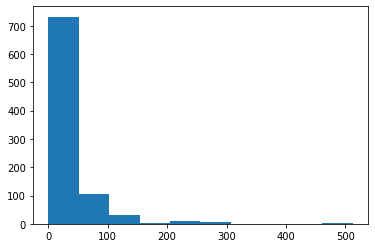

In [36]:
# trực quan hóa
plt.hist(df['Fare'])
plt.show()

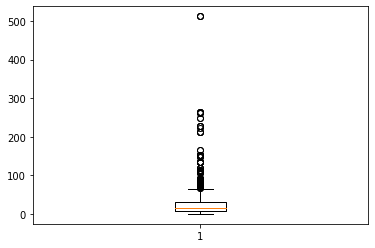

In [37]:
plt.boxplot(df['Fare'])
plt.show()

In [38]:
# có bao nhiêu giá trị outliers?
# tự làm


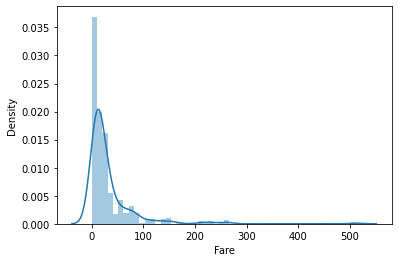

In [40]:
sns.distplot(df['Fare'].dropna())
plt.show()

### Categorical variables

In [41]:
# phân tích biến Pclass

In [42]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [43]:
df['Pclass'].value_counts() / len(df.index)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [44]:
df['Pclass'].value_counts() / df.shape[0]

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

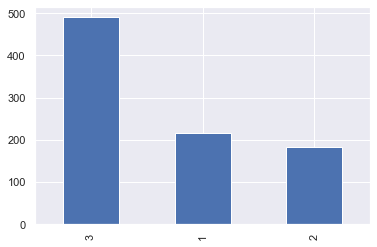

In [45]:
# trực quan hóa
sns.set()
df['Pclass'].value_counts().plot.bar()
plt.show()

## Phân tính hai biến

### Continuous - Continuous

In [46]:
# xem xét biến Fare và Age

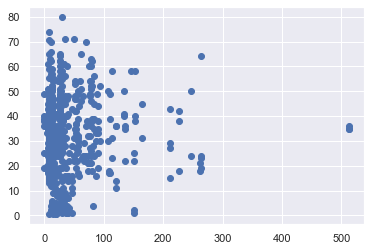

In [48]:
plt.scatter(df['Fare'], df['Age'])
plt.show()

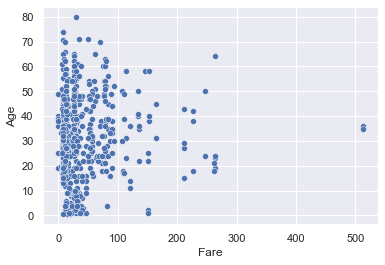

In [49]:
sns.scatterplot(df['Fare'], df['Age'])
plt.show()

In [50]:
df[['Fare', 'Age']].corr()

Fare       Age
Fare  1.000000  0.096067
Age   0.096067  1.000000

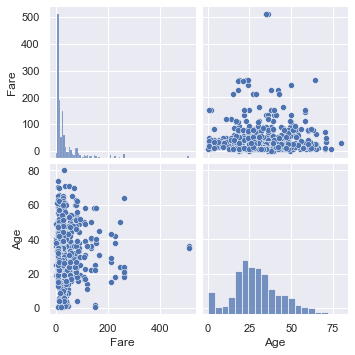

In [52]:
sns.pairplot(df[['Fare', 'Age']].dropna())
plt.show()

### Category - Category

In [53]:
# xem xét 2 biến Pclass và Sex

In [54]:
# contigency table
table = pd.crosstab(df['Pclass'], df['Sex'])
table

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347

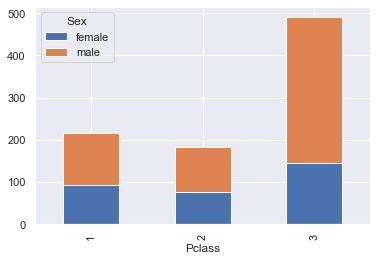

In [56]:
# trực quan hóa: stacked column chart
table.plot(kind='bar', stacked=True)
plt.show()

In [60]:
#chi-squared
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [61]:
stats, p_value, dof, expected = chi2_contingency(table)

In [62]:
print('Statistic: ', stats)
print('p-value: ', p_value)
print('Dof: ', dof)

Statistic:  16.971499095517114
p-value:  0.00020638864348233114
Dof:  2


In [66]:
# So sánh dùng p-value
proba = 0.95
alpha = 1 - proba
if p_value <= alpha:
    print('Pclass và Sex không phải là 2 biến độc lập (Reject H0)')
else:
    print('Pclass và Sex là 2 biến độc lập (Fail to reject H0)')

Pclass và Sex không phải là 2 biến độc lập (Reject H0)


In [64]:
# So sánh dùng statistic
critical = chi2.ppf(proba, dof)
critical

5.991464547107979

In [67]:
if abs(stats) >= critical:
    print('Pclass và Sex không phải là 2 biến độc lập (Reject H0)')
else:
    print('Pclass và Sex là 2 biến độc lập (Fail to reject H0)')

Pclass và Sex không phải là 2 biến độc lập (Reject H0)


### Category - Continuous

In [68]:
# xem xét mối quan hệ giữa Pclass, Sex và Fare

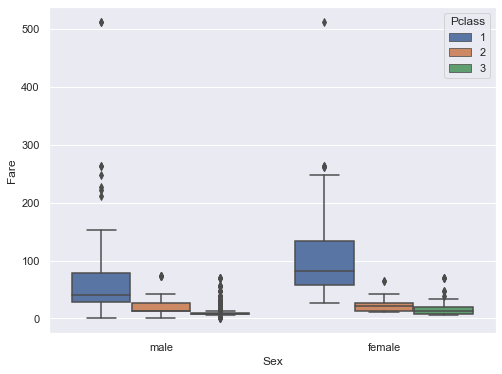

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sex', y='Fare', hue='Pclass')
plt.show()

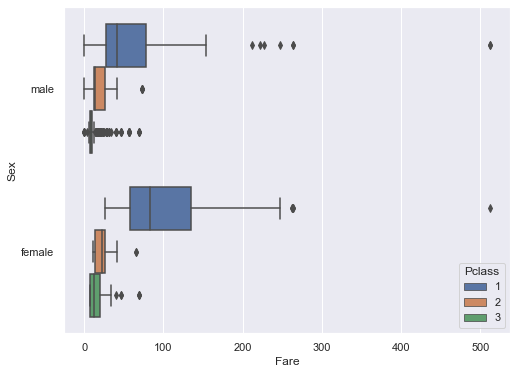

In [72]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Fare', y='Sex', hue='Pclass')
plt.show()

In [73]:
df_new = df[['Pclass', 'Sex', 'Fare']]
df_new.head()

Pclass     Sex     Fare
0       3    male   7.2500
1       1  female  71.2833
2       3  female   7.9250
3       1  female  53.1000
4       3    male   8.0500

In [75]:
df_new['Sex'] = df_new['Sex'].map(lambda x: 0 if x == 'female' else 1)

In [76]:
df_new.head()

Pclass  Sex     Fare
0       3    1   7.2500
1       1    0  71.2833
2       3    0   7.9250
3       1    0  53.1000
4       3    1   8.0500

In [78]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [80]:
model = ols('Fare ~ C(Pclass) + C(Sex) + C(Pclass):C(Sex)', data=df_new).fit()
# model.fit()

In [81]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df           F        PR(>F)
C(Pclass)         7.347122e+05    2.0  242.620968  9.763645e-85
C(Sex)            3.174857e+04    1.0   20.968394  5.337586e-06
C(Pclass):C(Sex)  5.002816e+04    2.0   16.520591  9.034206e-08
Residual          1.339992e+06  885.0         NaN           NaN

In [82]:
# p-value có được từ phân tích anova cho Sex, Pclass và sự phối hợp giữa pclass và Sex đều < 0.05
# --> có ý nghĩa thống kê 
# --> Pclass có ảnh hưởng tới Fare, Sex có ảnh hưởng tới Fare, sự phối hợp giữa Pclass và Sex có ảnh
# hưởng tới Fare


In [83]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [87]:
df_group = df_new.groupby(by='Sex')

In [91]:
for name, grouped_df in df_group:
    print('Sex ', name, pairwise_tukeyhsd(endog=grouped_df['Fare'], groups=grouped_df['Pclass'], alpha=0.05))

Sex  0   Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     1      2 -84.1557  0.001  -99.3122 -68.9991   True
     1      3  -90.007  0.001 -103.0354 -76.9786   True
     2      3  -5.8513 0.5783  -19.7819   8.0793  False
-------------------------------------------------------
Sex  1  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2 -47.4843  0.001 -59.0655 -35.9031   True
     1      3 -54.5645  0.001 -63.7907 -45.3383   True
     2      3  -7.0801 0.1978 -16.7387   2.5784  False
------------------------------------------------------


In [ ]:
#ngoại trừ Sex=0, (Pclass = 2, Pclass = 3) và Sex=1, (Pclass = 2, Pclass = 3) thì các trường hợp còn lại
# đều bác bỏ H0 ==> có ảnh hưởng đáng kể 